# Visualizer for dataset in TFRecord

In [1]:
import cv2
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from dnn.data.converters.utils import CLASS_NAMES

%matplotlib inline

In [2]:
IMAGE_FEATURE_MAP = {
    'image': tf.io.FixedLenFeature([], tf.string),
    'class_n': tf.io.FixedLenFeature([], tf.string),
    'bbox_yxyx_n4': tf.io.FixedLenFeature([], tf.string),
}


def _parse_image_function(example_proto):
    examples = tf.io.parse_single_example(example_proto, IMAGE_FEATURE_MAP)
    return examples


def draw_outputs(img, class_n, bbox_yxyx_n4, class_names):
    for class_id, bbox_yxyx in zip(class_n, bbox_yxyx_n4):
        x1y1 = (bbox_yxyx[1], bbox_yxyx[0])
        x2y2 = (bbox_yxyx[3], bbox_yxyx[2])
        img = cv2.rectangle(img, x1y1, x2y2, (255, 0, 0), 2)
        img = cv2.putText(img, f'{class_names[class_id]}', 
                          x1y1, cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 248, 248), 2)
    return img

In [3]:
# modify input_path to visualize for other tfrecord files
input_path = 'F:/RM/iRM_Autonomy_2020/dnn/data/roco/ROCO_5.tfrecords'
data_set = tf.data.TFRecordDataset(input_path).map(_parse_image_function)
data_source = iter(data_set)

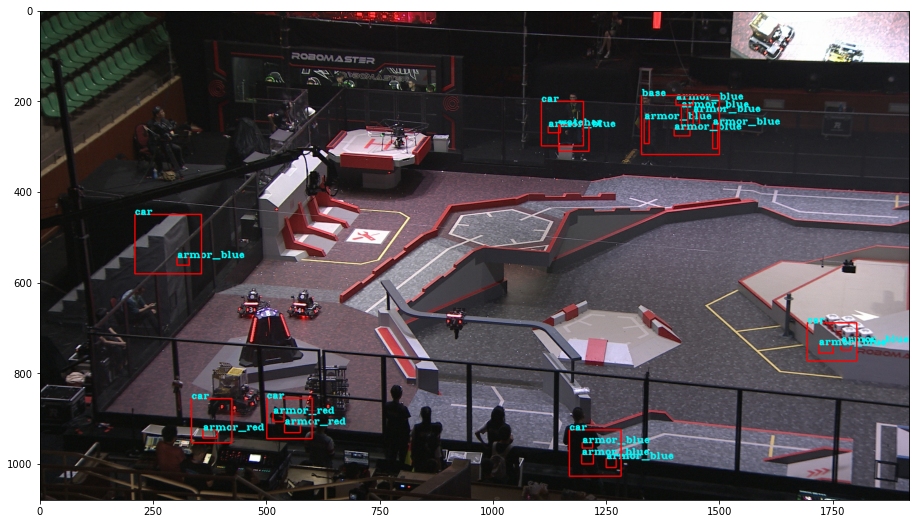

In [4]:
# repeatedly calling this cell will iterate through different data samples
image_features = next(data_source)
image_raw = tf.io.decode_image(image_features['image'], channels=3)
class_n = tf.io.parse_tensor(image_features['class_n'], tf.int32)
bbox_yxyx_n4 = tf.io.parse_tensor(image_features['bbox_yxyx_n4'], tf.float32)
img = draw_outputs(image_raw.numpy(), class_n, bbox_yxyx_n4, CLASS_NAMES)
plt.figure(figsize=(18,9))
plt.imshow(img)